In [91]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
import os


In [6]:
raindata = pd.read_csv("rainfall_in_india_1901-2015.csv")
print(raindata.head())

                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    690.6  
3   

In [8]:
print(raindata.columns)
print(set(raindata['SUBDIVISION']))
# ap_rain= raindata[raindata['SUBDIVISION']=='Andhra Pradesh']
# print(set(raindata['Year']))
# ap_rain_2000 = ap_rain[ap_rain['Year'] == 2000]
# print(ap_rain_2000)

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')
{'ARUNACHAL PRADESH', 'JHARKHAND', 'GUJARAT REGION', 'UTTARAKHAND', 'JAMMU & KASHMIR', 'COASTAL KARNATAKA', 'KERALA', 'NAGA MANI MIZO TRIPURA', 'RAYALSEEMA', 'WEST RAJASTHAN', 'VIDARBHA', 'ORISSA', 'NORTH INTERIOR KARNATAKA', 'LAKSHADWEEP', 'PUNJAB', 'EAST MADHYA PRADESH', 'EAST UTTAR PRADESH', 'HARYANA DELHI & CHANDIGARH', 'KONKAN & GOA', 'TAMIL NADU', 'WEST UTTAR PRADESH', 'WEST MADHYA PRADESH', 'EAST RAJASTHAN', 'ANDAMAN & NICOBAR ISLANDS', 'BIHAR', 'COASTAL ANDHRA PRADESH', 'ASSAM & MEGHALAYA', 'GANGETIC WEST BENGAL', 'TELANGANA', 'SAURASHTRA & KUTCH', 'SOUTH INTERIOR KARNATAKA', 'MATATHWADA', 'CHHATTISGARH', 'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'MADHYA MAHARASHTRA', 'HIMACHAL PRADESH'}


In [9]:
valid_states_rain = raindata[(raindata['SUBDIVISION']=='BIHAR') | (raindata['SUBDIVISION']=='KERALA') | (raindata['SUBDIVISION']=='ARUNACHAL PRADESH')|(raindata['SUBDIVISION']=='TAMIL NADU')|(raindata['SUBDIVISION']=='JAMMU & KASHMIR')|(raindata['SUBDIVISION']=='UTTARAKHAND')|(raindata['SUBDIVISION']=='ORISSA')|(raindata['SUBDIVISION']=='HIMACHAL PRADESH')|(raindata['SUBDIVISION']=='LAKSHADWEEP')|(raindata['SUBDIVISION']=='PUNJAB')|(raindata['SUBDIVISION']=='CHHATTISGARH')|(raindata['SUBDIVISION']=='ANDAMAN & NICOBAR ISLANDS')|(raindata['SUBDIVISION']=='JHARKHAND')]

In [10]:
print(set(valid_states_rain['SUBDIVISION']))
print(valid_states_rain.head())
valid_states_rain = valid_states_rain[['SUBDIVISION','YEAR','ANNUAL']]
print(valid_states_rain.head())
print(valid_states_rain.describe())

{'ARUNACHAL PRADESH', 'TAMIL NADU', 'ORISSA', 'JHARKHAND', 'UTTARAKHAND', 'LAKSHADWEEP', 'ANDAMAN & NICOBAR ISLANDS', 'JAMMU & KASHMIR', 'BIHAR', 'CHHATTISGARH', 'PUNJAB', 'KERALA', 'HIMACHAL PRADESH'}
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7 

In [11]:
valid_states_rain = valid_states_rain[valid_states_rain['YEAR']>1996]

In [12]:
valid_states_rain.columns = ['State','Year','Rainfall']


In [14]:
valid_states_rain

,State,Year,Rainfall
91,ANDAMAN & NICOBAR ISLANDS,1997,2755.1
92,ANDAMAN & NICOBAR ISLANDS,1998,2846.4
93,ANDAMAN & NICOBAR ISLANDS,1999,2699.7
94,ANDAMAN & NICOBAR ISLANDS,2000,2763.2
95,ANDAMAN & NICOBAR ISLANDS,2001,3080.9
96,ANDAMAN & NICOBAR ISLANDS,2002,2620.2
97,ANDAMAN & NICOBAR ISLANDS,2003,2355.9
98,ANDAMAN & NICOBAR ISLANDS,2004,2460.1
99,ANDAMAN & NICOBAR ISLANDS,2005,2954.7
100,ANDAMAN & NICOBAR ISLANDS,2006,2404.7


In [58]:
cropdata = pd.read_csv("apy.csv")
cropdata = cropdata.rename(columns={'State_Name': 'State', 'Crop_Year': 'Year'})
cropdata

,State,District_Name,Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.00
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.00
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.00
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.00
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.00


In [59]:
print(set(valid_states_rain['State']))
print(set(cropdata['State']))

{'Jharkhand', 'Tamil Nadu', 'Odisha', 'Arunachal Pradesh', 'Himachal Pradesh', 'Bihar', 'Jammu and Kashmir', 'Kerala', 'Chhattisgarh', 'Uttarakhand', 'Punjab', 'Andaman and Nicobar Islands'}
{'Madhya Pradesh', 'Jharkhand', 'Odisha', 'Maharashtra', 'Chhattisgarh', 'Karnataka', 'Nagaland', 'Uttar Pradesh', 'Andaman and Nicobar Islands', 'Manipur', 'West Bengal', 'Kerala', 'Punjab', 'Assam', 'Goa', 'Sikkim', 'Chandigarh', 'Arunachal Pradesh', 'Gujarat', 'Andhra Pradesh', 'Meghalaya', 'Mizoram', 'Dadra and Nagar Haveli', 'Himachal Pradesh', 'Uttarakhand', 'Tamil Nadu', 'Telangana ', 'Tripura', 'Bihar', 'Rajasthan', 'Puducherry', 'Haryana', 'Jammu and Kashmir '}


In [60]:
valid_states_crop = cropdata[(cropdata['State']=='Bihar') | (cropdata['State']=='Kerala') | (cropdata['State']=='Arunachal Pradesh')|(cropdata['State']=='Tamil Nadu')|(cropdata['State']=='Jammu and Kashmir ')|(cropdata['State']=='Uttarakhand')|(cropdata['State']=='Odisha')|(cropdata['State']=='Himachal Pradesh')|(cropdata['State']=='Punjab')|(cropdata['State']=='Chhattisgarh')|(cropdata['State']=='Andaman and Nicobar Islands')|(cropdata['State']=='Jharkhand')]

In [61]:
valid_states_crop

,State,District_Name,Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.00
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.00
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.00
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.00
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.00


In [62]:
print(set(valid_states_crop['State']))
print(set(valid_states_rain['State']))

{'Jharkhand', 'Tamil Nadu', 'Odisha', 'Arunachal Pradesh', 'Uttarakhand', 'Bihar', 'Kerala', 'Chhattisgarh', 'Himachal Pradesh', 'Punjab', 'Andaman and Nicobar Islands', 'Jammu and Kashmir '}
{'Jharkhand', 'Tamil Nadu', 'Odisha', 'Arunachal Pradesh', 'Himachal Pradesh', 'Bihar', 'Jammu and Kashmir', 'Kerala', 'Chhattisgarh', 'Uttarakhand', 'Punjab', 'Andaman and Nicobar Islands'}


In [63]:
valid_states_rain = valid_states_rain[valid_states_rain.State != 'LAKSHADWEEP']
valid_states_crop = valid_states_crop.replace('Jammu and Kashmir ','Jammu and Kashmir')
valid_states_rain = valid_states_rain.replace('UTTARAKHAND','Uttarakhand')
valid_states_rain = valid_states_rain.replace('ORISSA','Odisha')
valid_states_rain = valid_states_rain.replace('HIMACHAL PRADESH','Himachal Pradesh')
valid_states_rain = valid_states_rain.replace('JHARKHAND','Jharkhand')
valid_states_rain = valid_states_rain.replace('ARUNACHAL PRADESH','Arunachal Pradesh')
valid_states_rain = valid_states_rain.replace('TAMIL NADU','Tamil Nadu')
valid_states_rain = valid_states_rain.replace('CHHATTISGARH','Chhattisgarh')
valid_states_rain = valid_states_rain.replace('JAMMU & KASHMIR','Jammu and Kashmir')
valid_states_rain = valid_states_rain.replace('ANDAMAN & NICOBAR ISLANDS','Andaman and Nicobar Islands')
valid_states_rain = valid_states_rain.replace('BIHAR','Bihar')
valid_states_rain = valid_states_rain.replace('PUNJAB','Punjab')
valid_states_rain = valid_states_rain.replace('KERALA','Kerala')


In [64]:
print(set(valid_states_crop['State']))
print(set(valid_states_rain['State']))
print(len(valid_states_crop))

{'Jharkhand', 'Tamil Nadu', 'Odisha', 'Arunachal Pradesh', 'Uttarakhand', 'Bihar', 'Jammu and Kashmir', 'Kerala', 'Chhattisgarh', 'Himachal Pradesh', 'Punjab', 'Andaman and Nicobar Islands'}
{'Jharkhand', 'Tamil Nadu', 'Odisha', 'Arunachal Pradesh', 'Himachal Pradesh', 'Bihar', 'Jammu and Kashmir', 'Kerala', 'Chhattisgarh', 'Uttarakhand', 'Punjab', 'Andaman and Nicobar Islands'}
77189


In [65]:
#valid_states_crop.columns = ['State','Year','Crop','Area','Production','Rainfall']
Rainfall_list = [0]*77189
valid_states_crop['Rainfall'] = Rainfall_list


In [68]:
print(valid_states_crop.head())
print(valid_states_rain.head())

                         State District_Name  Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS  2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS  2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS  2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS  2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS  2000  Whole Year    

                  Crop    Area  Production  Rainfall  
0             Arecanut  1254.0      2000.0         0  
1  Other Kharif pulses     2.0         1.0         0  
2                 Rice   102.0       321.0         0  
3               Banana   176.0       641.0         0  
4            Cashewnut   720.0       165.0         0  
                          State  Year  Rainfall
91  Andaman and Nicobar Islands  1997    2755.1
92  Andaman and Nicobar Islands  1998    2846.4
93  Andaman and Nicobar Islands  1999    2699.7
94  Andaman and Nicobar Islands  2000    2763.2
95  Andaman and Nicobar Isl

In [108]:
states_set = set(valid_states_crop['State'])
year_set = set(valid_states_crop['Year'])
crop_set = set(valid_states_crop['Crop'])
print(states_set)
print(year_set)
print(crop_set)

{'Jharkhand', 'Tamil Nadu', 'Odisha', 'Arunachal Pradesh', 'Uttarakhand', 'Bihar', 'Jammu and Kashmir', 'Kerala', 'Chhattisgarh', 'Himachal Pradesh', 'Punjab', 'Andaman and Nicobar Islands'}
{1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
{'Arecanut', 'Pulses total', 'Niger seed', 'Litchi', 'other oilseeds', 'Bottle Gourd', 'Guar seed', 'Lentil', 'Cardamom', 'Moth', 'Mango', 'Cashewnut Raw', 'Coconut ', 'Beans & Mutter(Vegetable)', 'Apple', 'Cashewnut', 'Small millets', 'Black pepper', 'Other Cereals & Millets', 'Castor seed', 'Urad', 'Potato', 'Garlic', 'Pome Fruit', 'Brinjal', 'Papaya', 'Cowpea(Lobia)', 'Jowar', 'Wheat', 'Maize', 'Peach', 'Jack Fruit', 'Jute', 'Sannhamp', 'Cabbage', 'Onion', 'Bajra', 'Pump Kin', 'Ber', 'Bitter Gourd', 'Total foodgrain', 'Rice', 'Sunflower', 'Lab-Lab', 'Moong(Green Gram)', 'Ash Gourd', 'Banana', 'Tapioca', 'Pear', 'Arhar/Tur', 'Pome Granet', 'Varagu', 'Orange', 'Horse-gram', 'Turnip', 

In [70]:
for state in states_set:
    for year in year_set:
        #print(valid_states_crop[valid_states_crop['State']==state]['Year'])
        if(year in list(valid_states_crop[valid_states_crop['State']==state]['Year'])):
            #print(state,year)
            valid_states_crop.loc[(valid_states_crop['State']==state) & \
                              (valid_states_crop['Year']==year),'Rainfall']= \
            list(valid_states_rain[(valid_states_rain['State']==state) & \
                                   (valid_states_rain['Year']==year)]['Rainfall'])[0]

In [71]:
valid_states_crop

,State,District_Name,Year,Season,Crop,Area,Production,Rainfall
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.00,2763.2
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.00,2763.2
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,2763.2
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.00,2763.2
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.00,2763.2
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.00,2763.2
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.00,2763.2
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,2763.2
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.00,2763.2
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.00,2763.2


In [72]:
crop_data_alpha = valid_states_crop.dropna()
crop_data_alpha = crop_data_alpha[crop_data_alpha.Production !=0.0]
print(crop_data_alpha.head())
print(set(crop_data_alpha['Crop']))

                         State District_Name  Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS  2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS  2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS  2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS  2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS  2000  Whole Year    

                  Crop    Area  Production  Rainfall  
0             Arecanut  1254.0      2000.0    2763.2  
1  Other Kharif pulses     2.0         1.0    2763.2  
2                 Rice   102.0       321.0    2763.2  
3               Banana   176.0       641.0    2763.2  
4            Cashewnut   720.0       165.0    2763.2  
{'Arecanut', 'Pulses total', 'Niger seed', 'other oilseeds', 'Guar seed', 'Lentil', 'Cardamom', 'Moth', 'Mango', 'Cashewnut Raw', 'Coconut ', 'Beans & Mutter(Vegetable)', 'Cashewnut', 'Small millets', 'Black pepper', 'Other Cereals & Millets', 'Castor seed', 'Urad', 

In [73]:
crop_data_alpha = crop_data_alpha.drop('State',axis = 1)
crop_data_alpha = crop_data_alpha.drop('Year',axis = 1)
crop_data_alpha = crop_data_alpha.sort_values(by='Crop')
crop_data_alpha = crop_data_alpha.reset_index(drop=True)
print(crop_data_alpha.head())

    District_Name       Season      Crop    Area  Production  Rainfall
0        NICOBARS  Kharif       Arecanut  1254.0      2000.0    2763.2
1  PATHANAMTHITTA  Whole Year   Arecanut  1343.0      1317.0    2507.4
2      COIMBATORE  Whole Year   Arecanut  1732.0      3280.0     926.5
3      THIRUVARUR  Whole Year   Arecanut     5.0         7.0     927.9
4          IDUKKI  Whole Year   Arecanut  4054.0      4351.0    2886.1


In [80]:
for index,row in crop_data_alpha.iterrows():
    crop_data_alpha.loc[index,'Production'] = row['Production']/row['Area']
crop_data_alpha.head()

,District_Name,Season,Crop,Area,Production,Rainfall
0,NICOBARS,Kharif,Arecanut,1254.0,0.001272,2763.2
1,PATHANAMTHITTA,Whole Year,Arecanut,1343.0,0.000730,2507.4
2,COIMBATORE,Whole Year,Arecanut,1732.0,0.001093,926.5
3,THIRUVARUR,Whole Year,Arecanut,5.0,0.280000,927.9
4,IDUKKI,Whole Year,Arecanut,4054.0,0.000265,2886.1


In [82]:
wheat_data = crop_data_alpha[crop_data_alpha['Crop']=='Wheat']
print(len(wheat_data))
print(wheat_data.head())
print(wheat_data[wheat_data['Production']==3.0])

2584
      District_Name       Season   Crop      Area  Production  Rainfall
72181     FIROZEPUR  Rabi         Wheat  383000.0    0.000011     424.6
72182     MADHUBANI  Rabi         Wheat   92281.0    0.000009    1147.8
72183    PAPUM PARE  Rabi         Wheat     165.0    0.010101    2036.0
72184    PAPUM PARE  Rabi         Wheat     160.0    0.010937    2335.5
72185     MADHEPURA  Rabi         Wheat   38673.0    0.000085    1097.1
      District_Name       Season   Crop  Area  Production  Rainfall
73525        IDUKKI  Whole Year   Wheat   1.0         3.0    3046.4


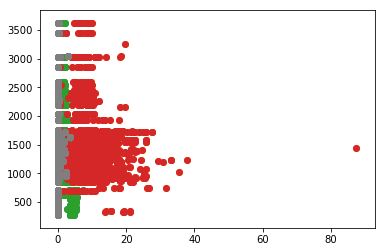

In [89]:
plt.scatter(wheat_data['Production'],wheat_data['Rainfall'])
plt.show()

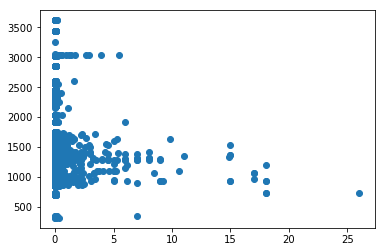

In [90]:
potato_data = crop_data_alpha[crop_data_alpha['Crop']=='Potato']
plt.scatter(potato_data['Production'],potato_data['Rainfall'])
plt.show()

## Linear Regressions

Wheat:

In [95]:
wheat_yield = pd.DataFrame(wheat_data['Production'])
wheat_rainfall = pd.DataFrame(wheat_data['Rainfall'])

In [103]:
lm = linear_model.LinearRegression()
wheat_model = lm.fit(wheat_rainfall, wheat_yield)

In [104]:
wheat_model.coef_

array([[  3.74340161e-05]])

In [105]:
wheat_model.intercept_

array([-0.01301198])

In [106]:
wheat_model.score(wheat_yield, wheat_rainfall)

-5.929777114438977

Grapes:

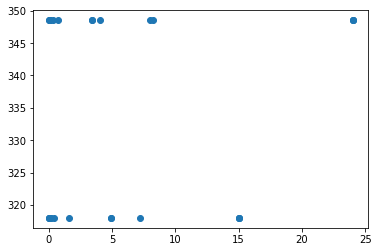

In [109]:
grape_data = crop_data_alpha[crop_data_alpha['Crop']=='Grapes']
plt.scatter(grape_data['Production'],grape_data['Rainfall'])
plt.show()

In [115]:
grape_yield = pd.DataFrame(grape_data['Production'])
grape_rainfall = pd.DataFrame(grape_data['Rainfall'])
grape_model = lm.fit(grape_rainfall, grape_yield)

In [116]:
grape_model.coef_

array([[ 0.07286135]])

In [117]:
grape_model.intercept_

array([-18.21006311])

Potatoes:

In [118]:
potato_yield = pd.DataFrame(potato_data['Production'])
potato_rainfall = pd.DataFrame(potato_data['Rainfall'])

In [119]:
potato_model = lm.fit(potato_rainfall, potato_yield)

In [120]:
potato_model.coef_

array([[-0.00029371]])

In [121]:
potato_model.intercept_

array([ 0.81806965])

Stats:

In [126]:
rainfall_data = crop_data_alpha['Rainfall']
rainfall_data.describe()

count    74975.000000
mean      1302.775097
std        555.243785
min        274.700000
25%       1032.400000
50%       1247.000000
75%       1437.300000
max       3616.700000
Name: Rainfall, dtype: float64

In [127]:
yield_data = crop_data_alpha['Production']
yield_data.describe()

count    7.497500e+04
mean     6.256967e+00
std      5.047135e+02
min      8.977305e-09
25%      3.333333e-04
50%      2.500000e-03
75%      2.366471e-02
max      7.300000e+04
Name: Production, dtype: float64